In [256]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn import metrics
from sklearn.compose import make_column_selector as selector
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.preprocessing import OrdinalEncoder

In [4]:
df = pd.read_csv('/Users/emmaalexander/Downloads/globalterrorismdb_0718dist.csv',encoding="ISO-8859-1")
df.head()

/Users/emmaalexander/opt/anaconda3/envs/metis/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [5]:
columns = df.columns
list(columns)

['eventid',
 'iyear',
 'imonth',
 'iday',
 'approxdate',
 'extended',
 'resolution',
 'country',
 'country_txt',
 'region',
 'region_txt',
 'provstate',
 'city',
 'latitude',
 'longitude',
 'specificity',
 'vicinity',
 'location',
 'summary',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'alternative',
 'alternative_txt',
 'multiple',
 'success',
 'suicide',
 'attacktype1',
 'attacktype1_txt',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'targtype1',
 'targtype1_txt',
 'targsubtype1',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1',
 'natlty1_txt',
 'targtype2',
 'targtype2_txt',
 'targsubtype2',
 'targsubtype2_txt',
 'corp2',
 'target2',
 'natlty2',
 'natlty2_txt',
 'targtype3',
 'targtype3_txt',
 'targsubtype3',
 'targsubtype3_txt',
 'corp3',
 'target3',
 'natlty3',
 'natlty3_txt',
 'gname',
 'gsubname',
 'gname2',
 'gsubname2',
 'gname3',
 'gsubname3',
 'motive',
 'guncertain1',
 'guncertain2',
 'guncertain3',
 'individual',
 'nperps',
 'nperpcap',
 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [7]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [114]:
mask = df['iyear'] > 2008
df_recent = df[mask]
df_recent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91536 entries, 90153 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 95.0+ MB


In [115]:
df_recent.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,9.153600e+04,91536.000000,91536.000000,91536.000000,91536.000000,91536.000000,91536.000000,91006.000000,91006.000000,91532.000000,...,4.430000e+02,4.180000e+02,4.260000e+02,412.000000,7392.000000,7376.000000,91536.000000,91536.000000,91536.000000,91536.000000
mean,2.013931e+11,2013.864775,6.465642,15.710748,0.061571,122.725900,8.118445,26.410366,52.538657,1.464461,...,3.099820e+06,6.010175e+05,7.170103e+05,22.349515,4.808306,-33.952684,-5.005233,-4.889781,0.060697,-4.578876
std,2.223188e+08,2.224098,3.394877,8.793002,0.240377,90.887153,2.327878,12.977620,33.440829,0.903872,...,1.799331e+07,8.104804e+06,1.332955e+07,492.949348,1.994220,67.443339,4.501535,4.639994,0.307208,4.693960
min,2.009010e+11,2009.000000,1.000000,0.000000,0.000000,4.000000,1.000000,-42.884049,-124.224996,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,2.012122e+11,2012.000000,4.000000,8.000000,0.000000,92.000000,6.000000,15.914432,40.724960,1.000000,...,-9.900000e+01,0.000000e+00,-9.900000e+01,0.000000,3.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.014080e+11,2014.000000,6.000000,16.000000,0.000000,95.000000,10.000000,32.409710,44.702866,1.000000,...,1.630000e+04,0.000000e+00,-9.900000e+01,0.000000,5.000000,0.000000,-9.000000,-9.000000,0.000000,-9.000000
75%,2.016021e+11,2016.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.195751,70.449593,1.000000,...,2.294857e+05,0.000000e+00,0.000000e+00,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,65.825119,176.986756,5.000000,...,2.000000e+08,1.320000e+08,2.750000e+08,10000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [772]:
summaries = df_recent[(df_recent['success'] == 0) & (df_recent.country_txt == 'United States')].reset_index()
summaries.at[0,'failure_reason']='bystander_action'
summaries.at[1,'failure_reason']='bomb_found'
summaries.at[2,'failure_reason']='bomb_found'
summaries.at[3,'failure_reason']='mail'
summaries.at[4,'failure_reason']='mail'
summaries.at[5,'failure_reason']='bomb_found'
summaries.at[6,'failure_reason']='bomb_found'
summaries.at[7,'failure_reason']='undirected'
summaries.at[8,'failure_reason']='bomb_found'
summaries.at[9,'failure_reason']='mail'
summaries.at[10,'failure_reason']='mail'
summaries.at[11,'failure_reason']='mail'
summaries.at[12,'failure_reason']='bomb_found'
summaries.at[13,'failure_reason']='arson_failed'
summaries.at[14,'failure_reason']='arson_failed'
summaries.at[15,'failure_reason']='bomb_found'
summaries.at[16,'failure_reason']='police_stopped'
summaries.at[17,'failure_reason']='bomb_found'
summaries.at[18,'failure_reason']='arson_failed'
summaries.at[19,'failure_reason']='bomb_found'
summaries.at[20,'failure_reason']='bystander_action'
summaries.at[21,'failure_reason']='police_stopped'
summaries.at[22,'failure_reason']='bomb_found'
summaries.at[23,'failure_reason']='arson_failed'
summaries.at[24,'failure_reason']='arson_failed'
summaries.at[25,'failure_reason']='bomb_found'
summaries.at[26,'failure_reason']='police_stopped'
summaries.at[27,'failure_reason']='undirected'
summaries.at[28,'failure_reason']='police_stopped'
summaries.at[29,'failure_reason']='police_stopped'
summaries.at[30,'failure_reason']='bomb_found'
summaries.at[31,'failure_reason']='undirected'
summaries.at[32,'failure_reason']='bomb_failed'
summaries

,index,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,...,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,failure_reason
0,94820,200912250024,2009,12,25,NaN,0,NaN,217,United States,...,"Daily News, Terror Suspect Umar Farouk Abdulm...","FBIS Report, Umar Farouk Abdulmutallab Indict...","National Counterterrorism Center, One Civilia...",ISVG,1,1,0,1,NaN,bystander_action
1,95520,201002250007,2010,2,25,NaN,0,NaN,217,United States,...,"Wall Street Journal, ""Amputee Arrested in Alle...","Wall Street Journal, ""Police Arrest Amputee in...",NaN,ISVG,-9,-9,0,-9,NaN,bomb_found
2,96291,201005010001,2010,5,1,NaN,0,NaN,217,United States,...,"New York Times, ""Car Bomb Leads to Evacuation ...","Adrian Carrasquillo, ""Pakistani Taliban Claims...","BBC Monitoring, ""Profile: Faisal Shahzad,"" BBC...",ISVG,1,1,0,1,NaN,bomb_found
3,99104,201011160004,2010,11,16,NaN,0,NaN,217,United States,...,"Bite Back, ""UCLA Vivisector Receives Threat,"" ...","Michael Martinez &, Nick Valencia, ""Activist G...","Robert Faturechi, ""UCLA Researcher Says He Won...",ISVG,0,1,0,1,NaN,mail
4,99765,201101070001,2011,1,7,NaN,0,NaN,217,United States,...,"CNN, ""At Least One Envelope Ignited in DC Post...","Time Magazine, ""Third Parcel Ignites in Postal...","Washington Post, ""Suspicious Package Reported ...",ISVG,-9,-9,0,-9,NaN,mail
5,99927,201101170018,2011,1,17,NaN,0,NaN,217,United States,...,"William Yardley, ""Suspect Charged in Attempted...","Federal Bureau of Investigation, ""Attempted Bo...","Associated Press, ""Washington: Maximum Sentenc...",ISVG,-9,-9,0,-9,NaN,bomb_found
6,101432,201105060004,2011,5,6,NaN,0,NaN,217,United States,...,"CBS 3 News, ""Police: IED Found Near Chester Tr...","Jawa Report, ""Chester, Pa: IED Found Near Trai...","United Press International, ""Police: Bomb Foun...",ISVG,-9,-9,0,-9,NaN,bomb_found
7,103916,201111110020,2011,11,11,NaN,0,NaN,217,United States,...,"""Document: White House shooter practiced for m...","""Idaho Man Pleads Guilty to Terrorism and Weap...","Andrew Zajac, ""White House Shooter Ortega-Hern...",START Primary Collection,-9,-9,0,-9,NaN,undirected
8,116183,201304180010,2013,4,18,NaN,0,NaN,217,United States,...,"""SMALL BOMB ?NEUTRALIZED? AT McCOOK AIRPORT,"" ...","""Explosive Device Found At McCook Airport,"" WO...",NaN,START Primary Collection,-9,-9,0,-9,NaN,bomb_found
9,117353,201305200073,2013,5,20,NaN,0,NaN,217,United States,...,"""Texas woman in ricin case sentenced to 18 yea...","""Texas woman is indicted over ricin letters to...","""Texas woman indicted for sending ricin letter...",START Primary Collection,-9,-9,0,-9,"201305200073, 201305200074, 201305200075",mail


In [783]:
failure_reasons = pd.DataFrame(summaries['failure_reason'].value_counts())
failure_reasons

,failure_reason
bomb_found,12
mail,5
arson_failed,5
police_stopped,5
undirected,3
bystander_action,2
bomb_failed,1


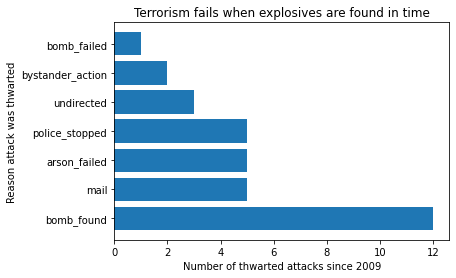

In [791]:
plt.barh(failure_reasons.index,failure_reasons['failure_reason'])
plt.xlabel('Number of thwarted attacks since 2009')
plt.ylabel('Reason attack was thwarted')
plt.title('Terrorism fails when explosives are found in time')
plt.show()

In [1475]:
df['success'].mean()

0.8895982739926579

In [895]:
df_clean = df.drop(columns=['approxdate','eventid','resolution','provstate','location','summary','alternative_txt','attacktype2_txt','attacktype3_txt','corp1','target1','targtype2','targtype2_txt','targsubtype2','targsubtype2_txt','corp2','target2','natlty2','natlty2_txt','natlty3','natlty3_txt','targtype3','targtype3_txt','targsubtype3','targsubtype3_txt','corp3','target3','gsubname','gname2','gsubname2','gsubname3','motive','guncertain2','guncertain3','individual','claimmode','claimmode_txt','claimmode2','claimmode3','claimmode2_txt','claimmode3_txt','claim3','claim2','compclaim','weaptype2','weaptype2_txt','weapsubtype2','weapsubtype2_txt','weaptype3','weapsubtype3_txt','weaptype4','weaptype4_txt','weapsubtype4','weapsubtype4_txt','weapdetail','propextent','propextent_txt','propvalue','propcomment','nhostkid','nhostkidus','nhours','ndays','divert','kidhijcountry','ransom','ransomamt','ransomamtus','ransompaid','ransomnote','hostkidoutcome','hostkidoutcome_txt','nreleased','addnotes','scite1','scite2','scite3','dbsource','related','attacktype3','attacktype2','alternative','weaptype3_txt','gname3','ransompaidus','weapsubtype3'])
list(df_clean.columns)

['iyear',
 'imonth',
 'iday',
 'extended',
 'country',
 'country_txt',
 'region',
 'region_txt',
 'city',
 'latitude',
 'longitude',
 'specificity',
 'vicinity',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'multiple',
 'success',
 'suicide',
 'attacktype1',
 'attacktype1_txt',
 'targtype1',
 'targtype1_txt',
 'targsubtype1',
 'targsubtype1_txt',
 'natlty1',
 'natlty1_txt',
 'gname',
 'guncertain1',
 'nperps',
 'nperpcap',
 'claimed',
 'weaptype1',
 'weaptype1_txt',
 'weapsubtype1',
 'weapsubtype1_txt',
 'nkill',
 'nkillus',
 'nkillter',
 'nwound',
 'nwoundus',
 'nwoundte',
 'property',
 'ishostkid',
 'INT_LOG',
 'INT_IDEO',
 'INT_MISC',
 'INT_ANY']

In [179]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91536 entries, 90153 to 181690
Data columns (total 49 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   iyear             91536 non-null  int64  
 1   imonth            91536 non-null  int64  
 2   iday              91536 non-null  int64  
 3   extended          91536 non-null  int64  
 4   country           91536 non-null  int64  
 5   country_txt       91536 non-null  object 
 6   region            91536 non-null  int64  
 7   region_txt        91536 non-null  object 
 8   city              91274 non-null  object 
 9   latitude          91006 non-null  float64
 10  longitude         91006 non-null  float64
 11  specificity       91532 non-null  float64
 12  vicinity          91536 non-null  int64  
 13  crit1             91536 non-null  int64  
 14  crit2             91536 non-null  int64  
 15  crit3             91536 non-null  int64  
 16  doubtterr         91535 non-null  f

In [896]:
df_num = df_clean.dropna()
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79896 entries, 5 to 181689
Data columns (total 49 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   iyear             79896 non-null  int64  
 1   imonth            79896 non-null  int64  
 2   iday              79896 non-null  int64  
 3   extended          79896 non-null  int64  
 4   country           79896 non-null  int64  
 5   country_txt       79896 non-null  object 
 6   region            79896 non-null  int64  
 7   region_txt        79896 non-null  object 
 8   city              79896 non-null  object 
 9   latitude          79896 non-null  float64
 10  longitude         79896 non-null  float64
 11  specificity       79896 non-null  float64
 12  vicinity          79896 non-null  int64  
 13  crit1             79896 non-null  int64  
 14  crit2             79896 non-null  int64  
 15  crit3             79896 non-null  int64  
 16  doubtterr         79896 non-null  float

In [ ]:
df_corr = df_num.corr()
df_corr.loc['success'].tail(50)

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [222]:
X = df_num.drop(columns=['success','imonth','iday','targtype1','country','latitude','longitude', 'region','attacktype1','weapsubtype1','weaptype1','natlty1','targsubtype1'])
y = df_num['success']

In [1476]:
X = merged_df.drop(columns=['success','targtype1','country', 'region','attacktype1','weapsubtype1','weaptype1','natlty1','targsubtype1'])
y = merged_df['success']

In [1480]:
X = merged_gdp.drop(columns=['success','targtype1','country', 'attacktype1','weapsubtype1','weaptype1','natlty1','targsubtype1'])
y = merged_gdp['success']
numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(X)
categorical_columns = categorical_columns_selector(X)
categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
numerical_preprocessor = StandardScaler()

preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_columns),
    ('standard_scaler', numerical_preprocessor, numerical_columns)])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [391]:
X.describe()

,iyear,extended,specificity,vicinity,crit1,crit2,crit3,doubtterr,multiple,suicide,...,nwound,nwoundus,nwoundte,property,ishostkid,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,police_per_100k
count,71684.000000,71684.000000,71684.000000,71684.000000,71684.000000,71684.000000,71684.000000,71684.000000,71684.000000,71684.000000,...,71684.000000,71684.000000,71684.000000,71684.000000,71684.000000,71684.000000,71684.00000,71684.000000,71684.000000,61716.000000
mean,2013.728824,0.025919,1.389975,0.077730,0.988770,0.996289,0.865298,0.156897,0.156716,0.057656,...,3.308869,0.011579,0.105714,-1.180780,0.034736,-5.334510,-5.23877,0.048253,-4.996066,179.580281
std,2.225219,0.158896,0.814192,0.313138,0.105375,0.060803,0.341408,0.363706,0.363535,0.233093,...,12.617756,0.709853,1.466357,3.664924,0.372819,4.450027,4.57283,0.214303,4.637285,137.934805
min,2009.000000,0.000000,1.000000,-9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-9.000000,-9.000000,-9.000000,-9.00000,0.000000,-9.000000,20.700000
25%,2012.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,-9.00000,0.000000,-9.000000,20.700000
50%,2014.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,-9.00000,0.000000,-9.000000,182.000000
75%,2015.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,330.000000
max,2017.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1500.000000,151.000000,150.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,798.000000


In [1309]:
numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(X)
categorical_columns = categorical_columns_selector(X)

In [1310]:
categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
numerical_preprocessor = StandardScaler()

preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_columns),
    ('standard_scaler', numerical_preprocessor, numerical_columns)])

In [1311]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [1349]:
model = make_pipeline(preprocessor, LogisticRegression(max_iter=500,C=100))

In [1481]:
model = make_pipeline(preprocessor, LogisticRegression(max_iter=500,C=100))

In [1350]:
model.fit(X_train, y_train)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one-hot-encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['region_txt', 'city',
                                                   'attacktype1_txt',
                                                   'targtype1_txt',
                                                   'targsubtype1_txt',
                                                   'victim_nationality',
                                                   'gname', 'weaptype1_txt',
                                                   'weapsubtype1_txt']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['iyear', 'imonth', 'iday',
                                                   'extended', 'latitude',
        

In [1351]:
model.score(X_val, y_val)

0.7410714285714286

In [1352]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
model['logisticregression'].coef_

array([[ 1.18124057e-01, -1.79442640e+00, -7.99169696e+00,
         1.14756242e+00, -4.85061975e-01, -2.89636125e+00,
        -5.15284359e+00,  2.85905451e-02, -4.31582446e-01,
         8.89476941e-02,  1.58195331e-03,  5.80795627e+00,
         1.74223779e+00,  1.04682461e-01,  2.17669106e-04,
         7.89562690e-01,  9.25703203e-04, -1.24540375e+01,
         5.79075632e+00,  2.05105791e+00, -8.67370525e+00,
         2.87963940e-01, -2.97253277e+00, -9.91062564e+00,
         1.33685746e+00,  2.41741486e-04,  8.00486418e-01,
        -7.52876085e+00,  1.21309291e+00, -4.00453878e+00,
         7.41025363e-02,  2.68469257e-02,  1.62377541e+00,
         2.77252484e+00, -1.19694151e+00,  3.27680187e-03,
         2.55752163e-03,  2.51987294e+00,  3.99577101e-03,
         1.14195499e-01,  2.90694370e+00,  6.23951183e-02,
         2.94385180e+00,  3.98148904e-02,  2.74468056e+00,
         1.27710399e+00,  3.02020401e-01,  6.72264905e-01,
         1.14303012e+00,  3.29541913e-01,  2.50070548e-0

In [1353]:
y_pred = model.predict(X_val)

In [1354]:
roc_auc_score(y_val,y_pred)

0.571818746120422

In [1357]:
precision_score(y_val,y_pred)

0.827027027027027

In [1358]:
recall_score(y_val,y_pred)

0.8547486033519553

In [1359]:
cf_matrix = confusion_matrix(y_val, y_pred)

print(cf_matrix)

[[ 13  32]
 [ 26 153]]


We're only catching 13 out of 45 failed attacks!

In [1484]:
153/(26+153)

0.8547486033519553

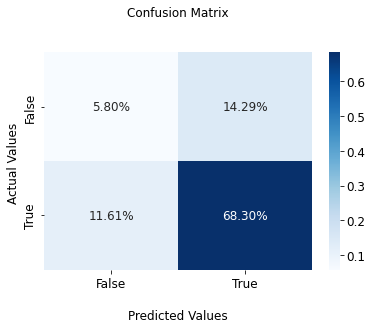

In [1360]:
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

In [1483]:
13/45


0.28888888888888886

In [900]:
categorical_preprocessor = OrdinalEncoder(handle_unknown="use_encoded_value",
                                          unknown_value=-1)
preprocessor = ColumnTransformer([
    ('categorical', categorical_preprocessor, categorical_columns)],
    remainder="passthrough")

model = make_pipeline(preprocessor, HistGradientBoostingClassifier(scoring='roc_auc'))
model.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('categorical',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['country_txt', 'region_txt',
                                                   'city', 'attacktype1_txt',
                                                   'natlty1_txt', 'gname',
                                                   'weaptype1_txt',
                                                   'weapsubtype1_txt'])])),
                ('histgradientboostingclassifier',
                 HistGradientBoostingClassifier(scoring='roc_auc'))])

In [904]:
model.score(X_val, y_val)

0.9709677419354839

In [905]:
y_pred = model.predict(X_val)

In [906]:
cf_matrix = confusion_matrix(y_val, y_pred)

print(cf_matrix)

[[ 1027   170]
 [  163 10110]]


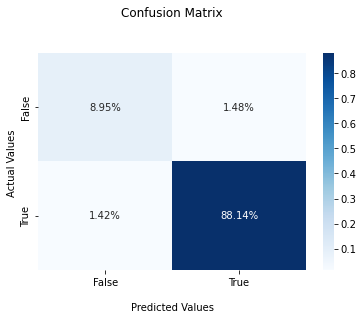

In [907]:
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

In [908]:
from xgboost import XGBClassifier
categorical_preprocessor = OrdinalEncoder(handle_unknown="use_encoded_value",
                                          unknown_value=-1)
preprocessor = ColumnTransformer([
    ('categorical', categorical_preprocessor, categorical_columns)],
    remainder="passthrough")

model = make_pipeline(preprocessor, XGBClassifier(scoring='roc_auc'))
model.fit(X_train, y_train)

/Users/emmaalexander/opt/anaconda3/envs/metis/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:34:45] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:576: 
Parameters: { "scoring" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:34:45] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('categorical',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['country_txt', 'region_txt',
                                                   'city', 'attacktype1_txt',
                                                   'natlty1_txt', 'gname',
                                                   'weaptype1_txt',
                                                   'weapsubtype1_txt'])])),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtr...
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6

In [909]:
model.score(X_val, y_val)

0.9709677419354839

In [910]:
y_pred = model.predict(X_val)

In [911]:
cf_matrix = confusion_matrix(y_val, y_pred)

print(cf_matrix)

[[ 1027   170]
 [  163 10110]]


We're catching 1027 / 1197 (86%) failed attacks now!
And we're catching 98% of successful attacks.

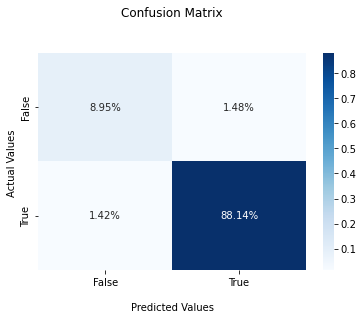

In [912]:
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

In [913]:
model['xgbclassifier'].feature_importances_

array([0.00892698, 0.00991532, 0.00532704, 0.118564  , 0.00940324,
       0.0062357 , 0.03104793, 0.01873392, 0.01486444, 0.00525214,
       0.00612985, 0.00613279, 0.00482144, 0.00661892, 0.00394726,
       0.00286446, 0.08064477, 0.00896717, 0.018853  , 0.01258065,
       0.004841  , 0.00518528, 0.01390565, 0.00818239, 0.05415358,
       0.00117955, 0.04956908, 0.10563733, 0.        , 0.0249829 ,
       0.16349715, 0.1231594 , 0.00403995, 0.00824819, 0.00372116,
       0.00691284, 0.0076069 , 0.01281203, 0.00783613, 0.00761963,
       0.00707885], dtype=float32)

In [914]:
list(X_train.columns)

['iyear',
 'imonth',
 'country_txt',
 'region_txt',
 'city',
 'latitude',
 'longitude',
 'specificity',
 'vicinity',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'multiple',
 'suicide',
 'attacktype1_txt',
 'natlty1_txt',
 'gname',
 'guncertain1',
 'nperps',
 'nperpcap',
 'claimed',
 'weaptype1_txt',
 'weapsubtype1_txt',
 'nkill',
 'nkillus',
 'nkillter',
 'nwound',
 'nwoundus',
 'nwoundte',
 'property',
 'ishostkid',
 'INT_LOG',
 'INT_IDEO',
 'INT_MISC',
 'INT_ANY',
 'police_per_100k',
 'gdp',
 'Population',
 'terror_count',
 'terror_pop']

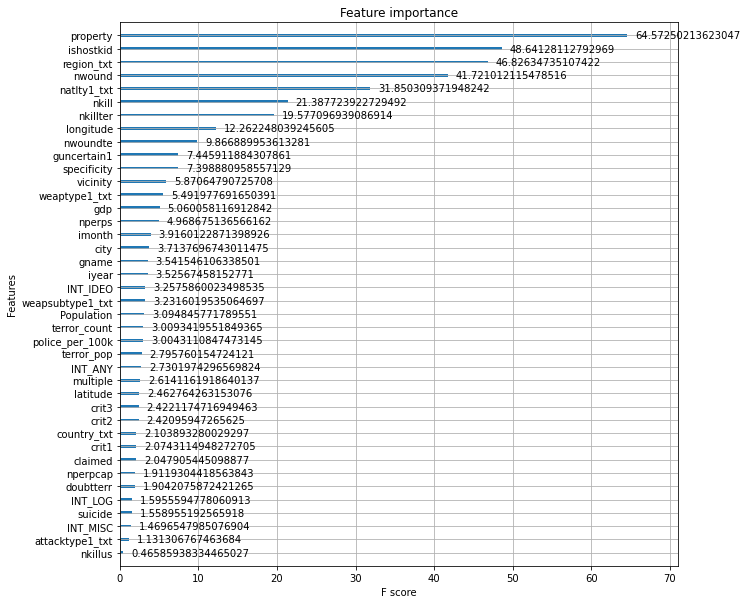

In [915]:
from xgboost import plot_importance
fig, ax = plt.subplots(1,1,figsize=(10,10))
model['xgbclassifier'].get_booster().feature_names = list(X_train.columns)
plot_importance(model['xgbclassifier'].get_booster(),ax=ax, importance_type='gain')
plt.show()

In [305]:
df_boxplot = X.copy()
df_boxplot['success'] = y
df_boxplot

,iyear,extended,country_txt,region_txt,city,specificity,vicinity,crit1,crit2,crit3,...,nwound,nwoundus,nwoundte,property,ishostkid,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,success
90153,2009,0,Somalia,Sub-Saharan Africa,Mogadishu,1.0,1,1,1,1,...,10.0,0.0,0.0,-9,0.0,0,0,0,0,1
90154,2009,0,Iraq,Middle East & North Africa,Mosul,1.0,0,1,1,1,...,0.0,0.0,0.0,-9,0.0,-9,-9,0,-9,1
90156,2009,0,Iraq,Middle East & North Africa,Mandali,1.0,0,1,1,1,...,3.0,0.0,0.0,1,0.0,-9,-9,0,-9,1
90157,2009,0,West Bank and Gaza Strip,Middle East & North Africa,Bayt Umar,1.0,1,1,1,1,...,0.0,0.0,0.0,-9,0.0,-9,-9,0,-9,1
90158,2009,0,India,South Asia,Guwahati,1.0,0,1,1,1,...,17.0,0.0,0.0,1,0.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181685,2017,0,Afghanistan,South Asia,Maymana,1.0,0,1,1,1,...,4.0,0.0,0.0,1,0.0,-9,-9,0,-9,1
181686,2017,0,Somalia,Sub-Saharan Africa,Ceelka Geelow,2.0,0,1,1,0,...,2.0,0.0,0.0,-9,0.0,0,0,0,0,1
181687,2017,0,Syria,Middle East & North Africa,Jableh,1.0,1,1,1,0,...,7.0,0.0,0.0,1,0.0,-9,-9,1,1,1
181688,2017,0,Philippines,Southeast Asia,Kubentog,2.0,0,1,1,1,...,0.0,0.0,0.0,1,0.0,0,0,0,0,1


In [337]:
failed = X_train[y_train==0]
success = X_train[y_train==1]
failed.country_txt.value_counts()

Iraq           740
Pakistan       612
India          532
Afghanistan    412
Philippines    306
              ... 
Argentina        1
Ghana            1
Ethiopia         1
Belgium          1
Jamaica          1
Name: country_txt, Length: 96, dtype: int64

In [371]:
list(success.country_txt.unique())

['Iraq',
 'Philippines',
 'Afghanistan',
 'Ukraine',
 'Egypt',
 'Yemen',
 'Pakistan',
 'Germany',
 'Libya',
 'Saudi Arabia',
 'Russia',
 'Nigeria',
 'Mali',
 'Greece',
 'Turkey',
 'West Bank and Gaza Strip',
 'Algeria',
 'Iran',
 'India',
 'Thailand',
 'Syria',
 'South Sudan',
 'Argentina',
 'Bangladesh',
 'Kenya',
 'Cameroon',
 'United Kingdom',
 'Democratic Republic of the Congo',
 'Ecuador',
 'Tunisia',
 'Somalia',
 'Nepal',
 'Colombia',
 'Italy',
 'Israel',
 'Lebanon',
 'South Africa',
 'Malaysia',
 'Switzerland',
 'Lesotho',
 'Kosovo',
 'Sweden',
 'Peru',
 'Ireland',
 'Sudan',
 'Mexico',
 'United States',
 'Niger',
 'Georgia',
 'Netherlands',
 'Burundi',
 'Tanzania',
 'Myanmar',
 'Indonesia',
 'Tajikistan',
 'Uganda',
 'Bahrain',
 'France',
 'China',
 'Morocco',
 'Canada',
 'Sri Lanka',
 'Paraguay',
 'Equatorial Guinea',
 'Austria',
 'Chad',
 'Belgium',
 'Chile',
 'Central African Republic',
 'Australia',
 'Venezuela',
 'Senegal',
 'Burkina Faso',
 'Kazakhstan',
 'Mozambique',
 'J

In [341]:
country_group = df_num.groupby('country_txt')['success'].mean()
country_group.sort_values().head(50)

country_txt
Guyana                      0.000000
Cambodia                    0.000000
Ghana                       0.000000
Bahamas                     0.000000
Moldova                     0.333333
Liberia                     0.333333
Ireland                     0.340206
Taiwan                      0.500000
Vietnam                     0.500000
South Korea                 0.500000
Zambia                      0.500000
United Arab Emirates        0.500000
Armenia                     0.600000
Uganda                      0.619048
Ecuador                     0.625000
Nepal                       0.628319
Switzerland                 0.666667
Dominican Republic          0.666667
Uzbekistan                  0.666667
Jamaica                     0.666667
United Kingdom              0.681890
West Bank and Gaza Strip    0.691558
Czech Republic              0.692308
Netherlands                 0.692308
Italy                       0.700000
Kyrgyzstan                  0.700000
Mauritania                

In [358]:
western_group = df_num[(df_num.region_txt == 'Western Europe') | (df_num.region_txt == 'North America')]
country_western = western_group.groupby('country_txt')['success'].mean().reset_index()
country_western.sort_values('success').head(50)

,country_txt,success
10,Ireland,0.340206
19,Switzerland,0.666667
20,United Kingdom,0.681890
14,Netherlands,0.692308
11,Italy,0.700000
13,Mexico,0.800000
7,Germany,0.830882
3,Cyprus,0.842105
1,Belgium,0.846154
8,Greece,0.851964


In [357]:
region_group = df_num.groupby('region_txt')['success'].mean().reset_index()
region_group.sort_values('success').head(50)

,region_txt,success
11,Western Europe,0.754551
1,Central America & Caribbean,0.777778
2,Central Asia,0.800000
6,North America,0.871148
4,Eastern Europe,0.878501
9,Southeast Asia,0.883852
8,South Asia,0.884740
7,South America,0.893530
3,East Asia,0.905263
5,Middle East & North Africa,0.910735


In [343]:
suicide_group = df_num.groupby('suicide')['success'].mean()
suicide_group.sort_values().head(50)

suicide
1    0.843697
0    0.897707
Name: success, dtype: float64

In [355]:
specificity_group = df_num.groupby('specificity')['success'].mean().reset_index()
specificity_group.sort_values('success').head(50)

,specificity,success
3,4.0,0.866214
0,1.0,0.893567
2,3.0,0.903639
1,2.0,0.906419


In [356]:
crit3_group = df_num.groupby('crit3')['success'].mean().reset_index()
crit3_group.sort_values('success').head(50)

,crit3,success
0,0,0.884321
1,1,0.896192


In [359]:
gname_group = df_num.groupby('gname')['success'].mean().reset_index()
gname_group.sort_values('success').tail(50)

,gname,success
287,Fatah al-Islam,1.0
420,Jammu and Kashmir Islamic Front,1.0
343,Hill Tiger Force (HTF),1.0
345,Hindu Illaignar Sena,1.0
381,Islamic Front (Syria),1.0
382,Islamic Jihad Union (Uzbekistan),1.0
384,Islamic Movement for the Liberation of Raja,1.0
386,Islamic Movement of Uzbekistan (IMU),1.0
387,Islamic Party (Somalia),1.0
390,Islamic State in the Greater Sahara (ISGS),1.0


In [361]:
us_group = df_num[(df_num.country_txt == 'United States')]
us_cities = us_group.groupby('city')['success'].mean().reset_index()
us_cities.sort_values('success').head(50)

,city,success
44,Cumming,0.000000
25,Champaign,0.000000
33,Chester,0.000000
132,Roswell,0.000000
48,Detroit,0.000000
148,Stephens City,0.000000
8,Aurora,0.000000
53,Fletcher,0.000000
164,Weirton,0.000000
2,Alexandria,0.000000


In [364]:
us_cities_count = us_group.groupby('city')['success'].count().reset_index()
us_cities_count.sort_values('success').tail(50)

,city,success
56,Fort Pierce,1
55,Fort Lauderdale,1
54,Flint,1
53,Fletcher,1
52,Falls Church,1
59,Garland,1
3,Annapolis,1
1,Albuquerque,2
6,Arlington,2
160,Vancouver,2


In [369]:
all_cities_count = df_num.groupby('city')['success'].count().reset_index()
all_cities_count.sort_values('success').tail(50)

,city,success
7374,Jerusalem,122
8545,Khost,123
10189,Makhachkala,124
1997,Bangkok,124
11672,Nahrawan,126
7247,Jamrud,128
9574,Lashkar Gah,136
3095,Bujumbura,138
5821,Ghazni,143
17524,Yusufiyah,152


In [916]:
police_df = pd.read_csv('/Users/emmaalexander/Downloads/police_data.csv')
police_df.head()

,country_txt,police_per_100k
0,Afghanistan,330
1,Algeria,396
2,Albania,326
3,Angola,350
4,Andorra,304


In [917]:
merged_df = df_num.merge(right=police_df,how='left',on='country_txt')
merged_df.head()

,iyear,imonth,iday,extended,country,country_txt,region,region_txt,city,latitude,...,nwound,nwoundus,nwoundte,property,ishostkid,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,police_per_100k
0,1970,1,1,0,217,United States,1,North America,Cairo,37.005105,...,0.0,0.0,0.0,1,0.0,-9,-9,0,-9,239.0
1,1970,1,2,0,217,United States,1,North America,Oakland,37.791927,...,0.0,0.0,0.0,1,0.0,-9,-9,0,-9,239.0
2,1970,1,2,0,217,United States,1,North America,Madison,43.076592,...,0.0,0.0,0.0,1,0.0,0,0,0,0,239.0
3,1970,1,3,0,217,United States,1,North America,Madison,43.072950,...,0.0,0.0,0.0,1,0.0,0,0,0,0,239.0
4,1970,1,6,0,217,United States,1,North America,Denver,39.758968,...,0.0,0.0,0.0,1,0.0,-9,-9,0,-9,239.0


In [918]:
merged_df.loc[merged_df.country_txt == 'Iraq','police_per_100k'] = 20.7
merged_df.head()

,iyear,imonth,iday,extended,country,country_txt,region,region_txt,city,latitude,...,nwound,nwoundus,nwoundte,property,ishostkid,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,police_per_100k
0,1970,1,1,0,217,United States,1,North America,Cairo,37.005105,...,0.0,0.0,0.0,1,0.0,-9,-9,0,-9,239.0
1,1970,1,2,0,217,United States,1,North America,Oakland,37.791927,...,0.0,0.0,0.0,1,0.0,-9,-9,0,-9,239.0
2,1970,1,2,0,217,United States,1,North America,Madison,43.076592,...,0.0,0.0,0.0,1,0.0,0,0,0,0,239.0
3,1970,1,3,0,217,United States,1,North America,Madison,43.072950,...,0.0,0.0,0.0,1,0.0,0,0,0,0,239.0
4,1970,1,6,0,217,United States,1,North America,Denver,39.758968,...,0.0,0.0,0.0,1,0.0,-9,-9,0,-9,239.0


In [919]:
all_police = df_num.groupby('city')['success'].count().reset_index()
all_cities_count.sort_values('success').tail(50)

,city,success
7374,Jerusalem,122
8545,Khost,123
10189,Makhachkala,124
1997,Bangkok,124
11672,Nahrawan,126
7247,Jamrud,128
9574,Lashkar Gah,136
3095,Bujumbura,138
5821,Ghazni,143
17524,Yusufiyah,152


In [920]:
merged_df[merged_df.success == 0]['police_per_100k'].mean()

202.72089012517384

In [921]:
merged_df[merged_df.success == 1]['police_per_100k'].mean()

184.19221115634

In [922]:
merged_df[merged_df.country_txt == 'United States']['success'].mean()

0.8263045032165832

In [923]:
merged_df[merged_df.police_per_100k > 300]['success'].mean()

0.903746802427647

In [924]:
merged_df[merged_df.success == 0]['doubtterr'].mean()

0.16076294277929154

In [925]:
merged_df[merged_df.success == 1]['doubtterr'].mean()

0.1529074242530264

In [927]:
mask = (merged_df['region_txt'] == 'North America') | (merged_df['region_txt'] == 'Western Europe')
west_df = merged_df[mask]
west_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3538 entries, 0 to 79888
Data columns (total 50 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   iyear             3538 non-null   int64  
 1   imonth            3538 non-null   int64  
 2   iday              3538 non-null   int64  
 3   extended          3538 non-null   int64  
 4   country           3538 non-null   int64  
 5   country_txt       3538 non-null   object 
 6   region            3538 non-null   int64  
 7   region_txt        3538 non-null   object 
 8   city              3538 non-null   object 
 9   latitude          3538 non-null   float64
 10  longitude         3538 non-null   float64
 11  specificity       3538 non-null   float64
 12  vicinity          3538 non-null   int64  
 13  crit1             3538 non-null   int64  
 14  crit2             3538 non-null   int64  
 15  crit3             3538 non-null   int64  
 16  doubtterr         3538 non-null   float64

In [930]:
X = west_df.drop(columns=['success','iday','targtype1','country','region','attacktype1','weapsubtype1','weaptype1','natlty1','targsubtype1'])
y = west_df['success']
numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(X)
categorical_columns = categorical_columns_selector(X)
categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
numerical_preprocessor = StandardScaler()

preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_columns),
    ('standard_scaler', numerical_preprocessor, numerical_columns)])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [931]:
categorical_preprocessor = OrdinalEncoder(handle_unknown="use_encoded_value",
                                          unknown_value=-1)
preprocessor = ColumnTransformer([
    ('categorical', categorical_preprocessor, categorical_columns)],
    remainder="passthrough")

model = make_pipeline(preprocessor, XGBClassifier(scoring='roc_auc'))
model.fit(X_train, y_train)

/Users/emmaalexander/opt/anaconda3/envs/metis/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:38:41] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:576: 
Parameters: { "scoring" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:38:41] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('categorical',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['country_txt', 'region_txt',
                                                   'city', 'attacktype1_txt',
                                                   'targtype1_txt',
                                                   'targsubtype1_txt',
                                                   'natlty1_txt', 'gname',
                                                   'weaptype1_txt',
                                                   'weapsubtype1_txt'])])),
                ('xgbclassifier',
                 XGBClas...
                               interaction_constraints='',
               

In [932]:
model.score(X_val, y_val)

0.9540636042402827

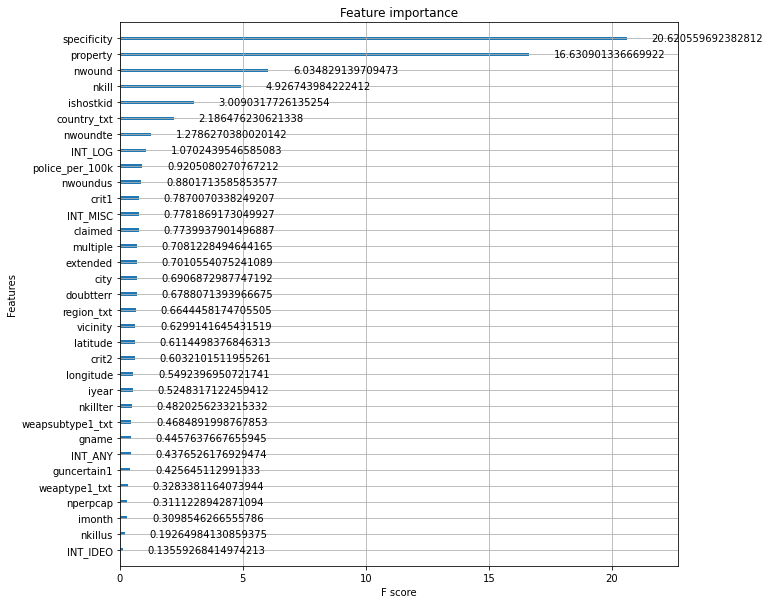

In [933]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
model['xgbclassifier'].get_booster().feature_names = list(X_train.columns)
plot_importance(model['xgbclassifier'].get_booster(),ax=ax, importance_type='gain')
plt.show()

In [934]:
west_df[west_df.country_txt == 'United States']['success'].mean()

0.8263045032165832

In [935]:
west_df['success'].mean()

0.7899943470887507

In [936]:
sorted_western = west_df.groupby('country_txt')['success'].mean().sort_values(ascending=False)

In [427]:
sorted_western

country_txt
Austria           1.000000
Iceland           1.000000
Portugal          1.000000
Finland           1.000000
Norway            1.000000
Malta             1.000000
Spain             0.945946
France            0.902597
Sweden            0.898305
United States     0.888889
Canada            0.885714
Denmark           0.857143
Greece            0.851964
Belgium           0.846154
Cyprus            0.842105
Germany           0.830882
Mexico            0.800000
Italy             0.700000
Netherlands       0.692308
United Kingdom    0.681890
Switzerland       0.666667
Ireland           0.340206
Name: success, dtype: float64

In [430]:
g7_mask = (merged_df['country_txt'] == 'United States') | (merged_df['country_txt'] == 'Japan') | (merged_df['country_txt'] == 'Italy') | (merged_df['country_txt'] == 'France') | (merged_df['country_txt'] == 'Germany') | (merged_df['country_txt'] == 'United Kingdom') | (merged_df['country_txt'] == 'Canada')

In [432]:
g7_df = merged_df[g7_mask]

In [434]:
sorted_g7 = g7_df.groupby('country_txt')['success'].mean().sort_values(ascending=False)
sorted_g7

country_txt
Japan             1.000000
France            0.902597
United States     0.888889
Canada            0.885714
Germany           0.830882
Italy             0.700000
United Kingdom    0.681890
Name: success, dtype: float64

In [435]:
g7_df['success'].mean()

0.7751937984496124

In [436]:
count_g7 = g7_df.groupby('country_txt')['success'].count().sort_values(ascending=False)
count_g7

country_txt
United Kingdom    635
United States     252
France            154
Germany           136
Italy              60
Canada             35
Japan              18
Name: success, dtype: int64

In [937]:
gdp_df = pd.read_csv('/Users/emmaalexander/Downloads/gdp_data.csv')
gdp_df.head(50)
gdp_df = gdp_df[['country_txt','gdp']]
gdp_df.tail(50)

,country_txt,gdp
216,South Sudan,NaN
217,Sub-Saharan Africa,1.669097e+12
218,Small states,4.799177e+11
219,Sao Tome and Principe,3.756141e+08
220,Suriname,3.591624e+09
221,Slovak Republic,9.515789e+10
222,Slovenia,4.846908e+10
223,Sweden,5.410187e+11
224,Eswatini,4.402969e+09
225,Sint Maarten (Dutch part),1.191620e+09


In [938]:
merged_gdp = merged_df.merge(right=gdp_df,how='left',on='country_txt')
merged_gdp.head(20)

,iyear,imonth,iday,extended,country,country_txt,region,region_txt,city,latitude,...,nwoundus,nwoundte,property,ishostkid,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,police_per_100k,gdp
0,1970,1,1,0,217,United States,1,North America,Cairo,37.005105,...,0.0,0.0,1,0.0,-9,-9,0,-9,239.0,1.954298e+13
1,1970,1,2,0,217,United States,1,North America,Oakland,37.791927,...,0.0,0.0,1,0.0,-9,-9,0,-9,239.0,1.954298e+13
2,1970,1,2,0,217,United States,1,North America,Madison,43.076592,...,0.0,0.0,1,0.0,0,0,0,0,239.0,1.954298e+13
3,1970,1,3,0,217,United States,1,North America,Madison,43.072950,...,0.0,0.0,1,0.0,0,0,0,0,239.0,1.954298e+13
4,1970,1,6,0,217,United States,1,North America,Denver,39.758968,...,0.0,0.0,1,0.0,-9,-9,0,-9,239.0,1.954298e+13
5,1970,1,9,0,217,United States,1,North America,Detroit,42.331685,...,0.0,0.0,1,0.0,-9,-9,0,-9,239.0,1.954298e+13
6,1970,1,9,0,217,United States,1,North America,Rio Piedras,18.386932,...,0.0,0.0,1,0.0,0,0,0,0,239.0,1.954298e+13
7,1970,1,12,0,217,United States,1,North America,New York City,40.697132,...,0.0,0.0,1,0.0,-9,-9,0,-9,239.0,1.954298e+13
8,1970,1,12,0,217,United States,1,North America,Rio Grande,18.379998,...,0.0,0.0,-9,0.0,-9,-9,0,-9,239.0,1.954298e+13
9,1970,1,13,0,217,United States,1,North America,Seattle,47.610786,...,0.0,0.0,1,0.0,-9,-9,0,-9,239.0,1.954298e+13


In [1477]:
X = merged_gdp.drop(columns=['success','targtype1','country','latitude','longitude', 'attacktype1','weapsubtype1','weaptype1','natlty1','targsubtype1'])
y = merged_gdp['success']
numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(X)
categorical_columns = categorical_columns_selector(X)
categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
numerical_preprocessor = StandardScaler()

preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_columns),
    ('standard_scaler', numerical_preprocessor, numerical_columns)])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [1478]:
categorical_preprocessor = OrdinalEncoder(handle_unknown="use_encoded_value",
                                          unknown_value=-1)
preprocessor = ColumnTransformer([
    ('categorical', categorical_preprocessor, categorical_columns)],
    remainder="passthrough")

model = make_pipeline(preprocessor, XGBClassifier(scoring='roc_auc'))
model.fit(X_train, y_train)

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[17:09:48] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:576: 
Parameters: { "scoring" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:09:48] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('categorical',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['country_txt', 'region_txt',
                                                   'city', 'attacktype1_txt',
                                                   'targtype1_txt',
                                                   'targsubtype1_txt',
                                                   'natlty1_txt', 'gname',
                                                   'weaptype1_txt',
                                                   'weapsubtype1_txt'])])),
                ('xgbclassifier',
                 XGBClas...
                               interaction_constraints='',
               

In [941]:
model.score(X_val, y_val)

0.9723873591989988

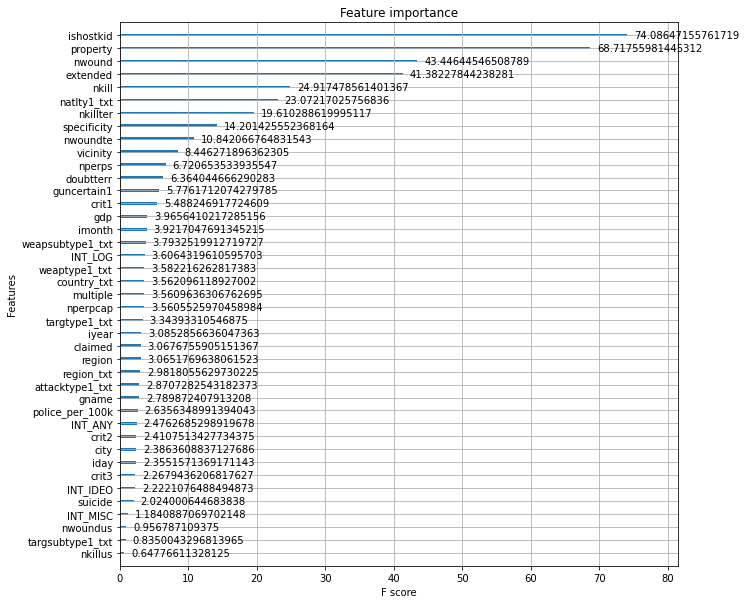

In [942]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
model['xgbclassifier'].get_booster().feature_names = list(X_train.columns)
plot_importance(model['xgbclassifier'].get_booster(),ax=ax, importance_type='gain')
plt.show()

In [943]:
pop_df = pd.read_csv('/Users/emmaalexander/Downloads/pop_data.csv')
pop_df.head()

,country_txt,Population
0,Aruba,105361.0
1,Africa Eastern and Southern,626392880.0
2,Afghanistan,36296111.0
3,Africa Western and Central,423769930.0
4,Angola,29816769.0


In [944]:
merged_pop = merged_gdp.merge(right=pop_df,how='left',on='country_txt')
merged_pop.head(20)

,iyear,imonth,iday,extended,country,country_txt,region,region_txt,city,latitude,...,nwoundte,property,ishostkid,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,police_per_100k,gdp,Population
0,1970,1,1,0,217,United States,1,North America,Cairo,37.005105,...,0.0,1,0.0,-9,-9,0,-9,239.0,1.954298e+13,325122128.0
1,1970,1,2,0,217,United States,1,North America,Oakland,37.791927,...,0.0,1,0.0,-9,-9,0,-9,239.0,1.954298e+13,325122128.0
2,1970,1,2,0,217,United States,1,North America,Madison,43.076592,...,0.0,1,0.0,0,0,0,0,239.0,1.954298e+13,325122128.0
3,1970,1,3,0,217,United States,1,North America,Madison,43.072950,...,0.0,1,0.0,0,0,0,0,239.0,1.954298e+13,325122128.0
4,1970,1,6,0,217,United States,1,North America,Denver,39.758968,...,0.0,1,0.0,-9,-9,0,-9,239.0,1.954298e+13,325122128.0
5,1970,1,9,0,217,United States,1,North America,Detroit,42.331685,...,0.0,1,0.0,-9,-9,0,-9,239.0,1.954298e+13,325122128.0
6,1970,1,9,0,217,United States,1,North America,Rio Piedras,18.386932,...,0.0,1,0.0,0,0,0,0,239.0,1.954298e+13,325122128.0
7,1970,1,12,0,217,United States,1,North America,New York City,40.697132,...,0.0,1,0.0,-9,-9,0,-9,239.0,1.954298e+13,325122128.0
8,1970,1,12,0,217,United States,1,North America,Rio Grande,18.379998,...,0.0,-9,0.0,-9,-9,0,-9,239.0,1.954298e+13,325122128.0
9,1970,1,13,0,217,United States,1,North America,Seattle,47.610786,...,0.0,1,0.0,-9,-9,0,-9,239.0,1.954298e+13,325122128.0


In [945]:
terror_count = merged_pop.groupby('country_txt')['success'].count().reset_index()
terror_count['terror_count'] = terror_count['success']
terror_count = terror_count.drop(columns=['success'])
merged_terror = merged_pop.merge(right=terror_count,how='left',on='country_txt')
merged_terror['terror_pop'] = merged_terror['terror_count'] / merged_terror['Population']
merged_terror.head()

,iyear,imonth,iday,extended,country,country_txt,region,region_txt,city,latitude,...,ishostkid,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,police_per_100k,gdp,Population,terror_count,terror_pop
0,1970,1,1,0,217,United States,1,North America,Cairo,37.005105,...,0.0,-9,-9,0,-9,239.0,1.954298e+13,325122128.0,1399,0.000004
1,1970,1,2,0,217,United States,1,North America,Oakland,37.791927,...,0.0,-9,-9,0,-9,239.0,1.954298e+13,325122128.0,1399,0.000004
2,1970,1,2,0,217,United States,1,North America,Madison,43.076592,...,0.0,0,0,0,0,239.0,1.954298e+13,325122128.0,1399,0.000004
3,1970,1,3,0,217,United States,1,North America,Madison,43.072950,...,0.0,0,0,0,0,239.0,1.954298e+13,325122128.0,1399,0.000004
4,1970,1,6,0,217,United States,1,North America,Denver,39.758968,...,0.0,-9,-9,0,-9,239.0,1.954298e+13,325122128.0,1399,0.000004


In [948]:
X = merged_terror.drop(columns=['success','targtype1_txt','targsubtype1_txt','targtype1','country','iday','region','attacktype1','weaptype1','natlty1','weapsubtype1','targsubtype1'])
y = merged_terror['success']
numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(X)
categorical_columns = categorical_columns_selector(X)
categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
numerical_preprocessor = StandardScaler()

preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_columns),
    ('standard_scaler', numerical_preprocessor, numerical_columns)])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [949]:
categorical_preprocessor = OrdinalEncoder(handle_unknown="use_encoded_value",
                                          unknown_value=-1)
preprocessor = ColumnTransformer([
    ('categorical', categorical_preprocessor, categorical_columns)],
    remainder="passthrough")

model = make_pipeline(preprocessor, XGBClassifier(scoring='roc_auc'))
model.fit(X_train, y_train)

/Users/emmaalexander/opt/anaconda3/envs/metis/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:42:38] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:576: 
Parameters: { "scoring" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:42:38] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('categorical',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['country_txt', 'region_txt',
                                                   'city', 'attacktype1_txt',
                                                   'natlty1_txt', 'gname',
                                                   'weaptype1_txt',
                                                   'weapsubtype1_txt'])])),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtr...
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6

In [950]:
model.score(X_val,y_val)

0.9705882352941176

In [638]:
#mask_1 = merged_terror.groupby('gname')['success'].count().reset_index()
#mask_1 = mask_1[mask_1['success'] < 2]
#drop = list(mask_1['gname'])
#for val in drop:
#    merged_terror.drop(merged_terror[merged_terror['gname'] == val].index, inplace = True)
#merged_terror.groupby('gname')['success'].count().reset_index().sort_values('success')

,gname,success
559,Zomi Revolutionary Army (ZRA),2
361,Naga extremists,2
108,Basque Separatists,2
109,Bedouin Movement (Sudan),2
112,Biafra Zionist Movement (BZM),2
...,...,...
116,Boko Haram,1480
37,Al-Shabaab,1942
224,Islamic State of Iraq and the Levant (ISIL),3749
501,Taliban,4591


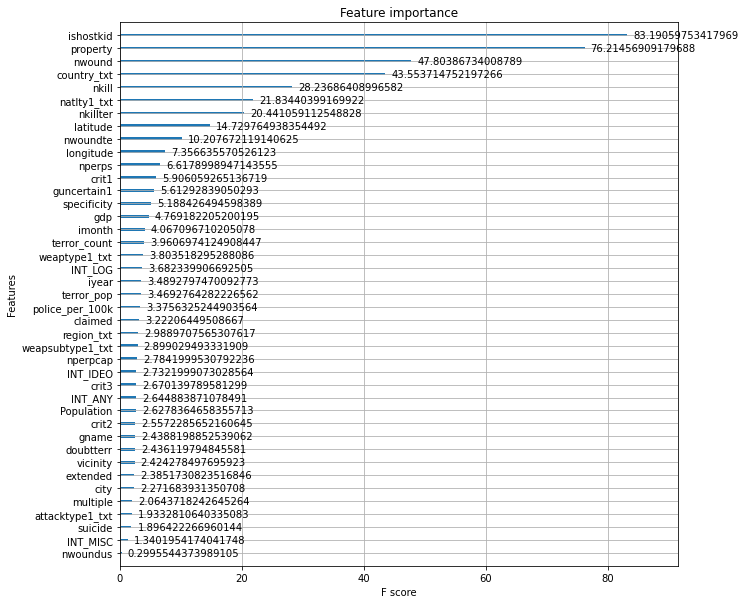

In [951]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
model['xgbclassifier'].get_booster().feature_names = list(X_val.columns)
plot_importance(model['xgbclassifier'].get_booster(),ax=ax, importance_type='gain')
plt.show()

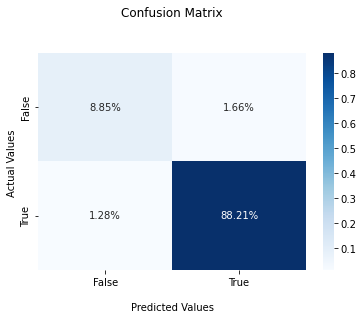

In [953]:
y_pred = model.predict(X_val)
cf_matrix = confusion_matrix(y_val, y_pred)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

In [954]:
merged_terror['region_txt'].value_counts()

Middle East & North Africa     29552
South Asia                     27157
Sub-Saharan Africa              7753
Southeast Asia                  7137
Eastern Europe                  2805
Western Europe                  2011
South America                   1534
North America                   1527
Central Asia                     162
East Asia                        133
Australasia & Oceania             64
Central America & Caribbean       61
Name: region_txt, dtype: int64

In [955]:
merged_terror[merged_terror.region_txt == 'Middle East & North Africa']['success'].mean()

0.9116134271792096

In [956]:
merged_terror[merged_terror.region_txt == 'South Asia']['success'].mean()

0.8885002025260522

In [957]:
merged_terror[merged_terror.region_txt == 'Sub-Saharan Africa']['success'].mean()

0.9151296272410679

In [958]:
merged_terror[merged_terror.region_txt == 'Southeast Asia']['success'].mean()

0.8869272803699033

In [959]:
merged_terror[merged_terror.region_txt == 'Eastern Europe']['success'].mean()

0.8720142602495544

In [960]:
merged_terror[merged_terror.region_txt == 'South America']['success'].mean()

0.89374185136897

In [961]:
merged_terror[merged_terror.region_txt == 'Western Europe']['success'].mean()

0.7623073097961214

In [961]:
merged_terror[merged_terror.region_txt == 'Western Europe']['success'].mean()

0.7623073097961214

In [1492]:
merged_terror[merged_terror.>=0]['success'].mean()

0.8943501552017623

In [963]:
merged_terror[merged_terror.natlty1_txt == 'United States']['success'].mean()

0.8295819935691319

In [964]:
mask = merged_terror['country_txt'] == 'United States'
df_united = merged_terror[mask]
df_united.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1399 entries, 0 to 79740
Data columns (total 54 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   iyear             1399 non-null   int64  
 1   imonth            1399 non-null   int64  
 2   iday              1399 non-null   int64  
 3   extended          1399 non-null   int64  
 4   country           1399 non-null   int64  
 5   country_txt       1399 non-null   object 
 6   region            1399 non-null   int64  
 7   region_txt        1399 non-null   object 
 8   city              1399 non-null   object 
 9   latitude          1399 non-null   float64
 10  longitude         1399 non-null   float64
 11  specificity       1399 non-null   float64
 12  vicinity          1399 non-null   int64  
 13  crit1             1399 non-null   int64  
 14  crit2             1399 non-null   int64  
 15  crit3             1399 non-null   int64  
 16  doubtterr         1399 non-null   float64

In [1258]:
df_united.at[34510,'success'] = 1
df_united.loc[34510,'success']

1

In [1267]:
df_united = df_united.rename(columns={'natlty1_txt': 'victim_nationality'})

In [1499]:
X = df_united.drop(columns=['success','region','country_txt','country'])
y = df_united['success']
numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(X)
categorical_columns = categorical_columns_selector(X)
categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
numerical_preprocessor = StandardScaler()

preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_columns),
    ('standard_scaler', numerical_preprocessor, numerical_columns)])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [1500]:
categorical_preprocessor = OrdinalEncoder(handle_unknown="use_encoded_value",
                                          unknown_value=-1)
preprocessor = ColumnTransformer([
    ('categorical', categorical_preprocessor, categorical_columns)],
    remainder="passthrough")

model = make_pipeline(preprocessor, XGBClassifier(scoring='roc_auc', n_estimators=15,learning_rate=.3))
model.fit(X_train, y_train)

[08:53:45] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:576: 
Parameters: { "scoring" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[08:53:45] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('categorical',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['region_txt', 'city',
                                                   'attacktype1_txt',
                                                   'targtype1_txt',
                                                   'targsubtype1_txt',
                                                   'victim_nationality',
                                                   'gname', 'weaptype1_txt',
                                                   'weapsubtype1_txt'])])),
                ('xgbclassifier',
                 XGBClassifier(...
                               gamma=0, gpu_id=-1, importance_type=None,
  

In [1501]:
model.score(X_val,y_val)

0.9464285714285714

In [1262]:
df_united.natlty1_txt.value_counts()

United States               1338
Puerto Rico                   21
Israel                         9
Vietnam                        8
Virgin Islands (U.S.)          3
Soviet Union                   3
Cuba                           2
China                          2
India                          2
Mexico                         2
Haiti                          2
Libya                          2
West Bank and Gaza Strip       1
Colombia                       1
Iran                           1
Saudi Arabia                   1
Ireland                        1
Name: natlty1_txt, dtype: int64

In [1264]:
df_united[df_united.natlty1_txt != 'United States']['success'].mean()

0.6885245901639344

In [1508]:
df_united[(df_united.success == 0) & (df_united.property>=0)]['property'].mean()

0.10084033613445378

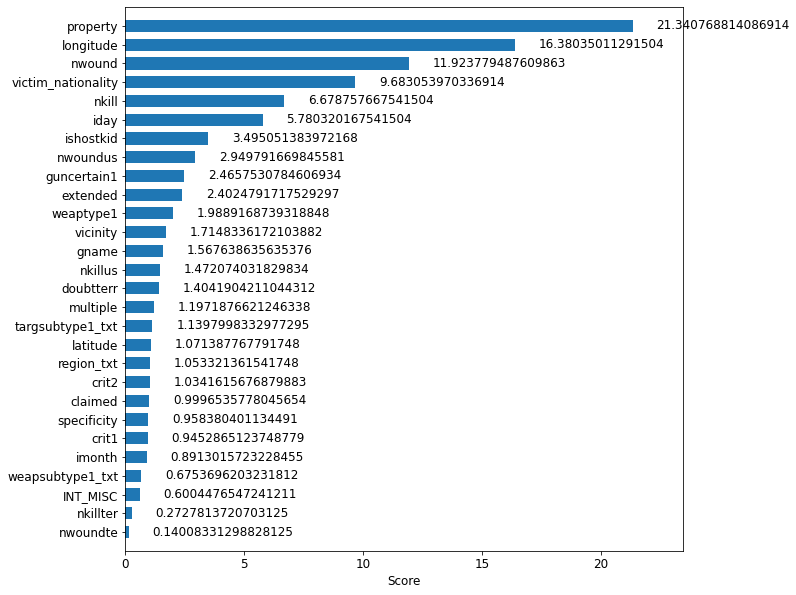

In [1503]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
model['xgbclassifier'].get_booster().feature_names = list(X_val.columns)
plot_importance(model['xgbclassifier'].get_booster(),ax=ax, importance_type='gain',title='',ylabel='',height=.65,xlabel='Score')
plt.rc('axes', titlesize=12,labelsize=12)
plt.grid(visible=None)
plt.show()

In [1302]:
plt.rcParams.update({'font.size': 12})

In [1275]:
model['xgbclassifier'].get_booster()

In [1172]:
import shap

In [1185]:
import xgboost
Xd = xgboost.DMatrix(X_train, label=y,enable_categorical=True)
model = xgboost.train({
    'eta':1, 'max_depth':3, 'base_score': 0, "lambda": 0
}, Xd, 1)
print("Model error =", np.linalg.norm(y-model.predict(Xd)))
print(model.get_dump(with_stats=True)[0])
pred = model.predict(X_val, output_margin=True)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_val)
np.abs(shap_values.sum(1) + explainer.expected_value - pred).max()

ValueError: DataFrame.dtypes for data must be int, float, bool or category.  When
                categorical type is supplied, DMatrix parameter `enable_categorical` must
                be set to `True`.region_txt, city, attacktype1_txt, targtype1_txt, targsubtype1_txt, natlty1_txt, gname, weaptype1_txt, weapsubtype1_txt

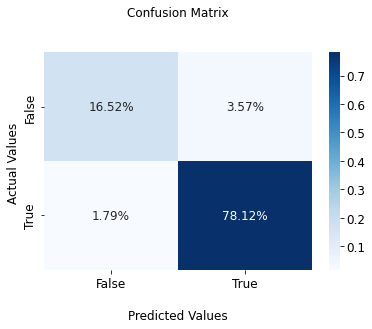

In [1402]:
y_pred = model.predict(X_val)
cf_matrix = confusion_matrix(y_val, y_pred)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

In [1403]:
model.score(X_test,y_test)

0.9607142857142857

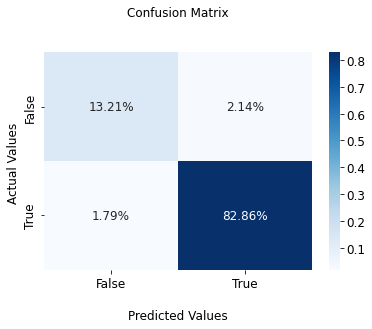

In [1404]:
y_pred_test = model.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_test)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

In [1408]:
cf_matrix

array([[ 37,   6],
       [  5, 232]])

### Catches 86% of failed attacks

### Catches 98% of successful attacks

In [970]:
print(df_united[df_united.imonth == 1]['success'].mean())
print(df_united[df_united.imonth == 2]['success'].mean())
print(df_united[df_united.imonth == 3]['success'].mean())
print(df_united[df_united.imonth == 4]['success'].mean())
print(df_united[df_united.imonth == 5]['success'].mean())
print(df_united[df_united.imonth == 6]['success'].mean())
print(df_united[df_united.imonth == 7]['success'].mean())
print(df_united[df_united.imonth == 8]['success'].mean())
print(df_united[df_united.imonth == 9]['success'].mean())
print(df_united[df_united.imonth == 10]['success'].mean())
print(df_united[df_united.imonth == 11]['success'].mean())
print(df_united[df_united.imonth == 12]['success'].mean())

0.7983870967741935
0.7837837837837838
0.803030303030303
0.8363636363636363
0.8106508875739645
0.8411214953271028
0.8983050847457628
0.89
0.7444444444444445
0.8484848484848485
0.8375
0.8269230769230769


In [1008]:
summaries_not_us_nat = df[(df.natlty1_txt != 'United States') & (df.country_txt == 'United States') & (df.success == 0)]
summaries_not_us_nat['attacktype1_txt'].value_counts()

Bombing/Explosion                      48
Assassination                          16
Armed Assault                           3
Facility/Infrastructure Attack          2
Unknown                                 2
Hijacking                               1
Hostage Taking (Barricade Incident)     1
Name: attacktype1_txt, dtype: int64

In [1413]:
for summary in summaries_not_us_nat.summary:
    print(summary)

4/4/1970: In a series of related attacks that failed, unknown perpetrators placed a pipe bomb at the Banco de Ponce in Manhattan, New York, United States.  The bomb was discovered and subsequently disarmed.
4/23/1970: In a series of four related incidents, the Armed Commandos of Liberation claimed credit for placing bombs in a Puerto Rican police station.  The perpetrators were targeting communication devices.  Cumulatively, fifty-one out of fifty-three bombs failed to explode with the remaining two bombs causing minor damage.
4/24/1970: Republic of China's Vice Premier, Chiang Ching-kuo was visiting the United States for a meeting of the Far East-America Council of Commerce and Industry. While entering Manhattan's Plaza Hotel for a luncheon, an Asian man ran towards Chiang, pointing a black automated pistol. New York Detective James Ziede, acting as Chiang's security, grabbed the  assailant's arm before he shot, deflecting the bullet aimed at Chiang towards the glass door and Chiang r

In [1410]:
df[(df.natlty1_txt != 'United States') & (df.country_txt == 'United States')]['success'].mean()

0.8027027027027027

In [1415]:
df[(df.natlty1_txt == 'United States') & (df.country_txt == 'United States')& (df.attacktype1_txt != 'Bombing/Explosion')]['success'].mean()

0.8702290076335878

In [1018]:
df[(df.natlty1_txt == 'Vietnam') & (df.country_txt == 'United States')& (df.attacktype1_txt != 'Bombing/Explosion')]['success'].mean()

0.5555555555555556

In [1411]:
df[(df.natlty1_txt == 'United States') & (df.country_txt == 'United States')& (df.attacktype1_txt != 'Bombing/Explosion')]['success'].mean()

0.8702290076335878

In [1020]:
df[(df.region_txt == 'Western Europe')]['attacktype1_txt'].value_counts()

Bombing/Explosion                      8508
Assassination                          2938
Facility/Infrastructure Attack         2631
Armed Assault                          1724
Hostage Taking (Kidnapping)             269
Unknown                                 265
Unarmed Assault                         148
Hostage Taking (Barricade Incident)      89
Hijacking                                67
Name: attacktype1_txt, dtype: int64

In [1037]:
df[(df.region_txt == 'Western Europe')& (df.attacktype1_txt == 'Bombing/Explosion')& (df.iyear > 2008)]['success'].mean()

0.4977220956719818

In [1039]:
df[(df.region_txt == 'Western Europe')& (df.attacktype1_txt != 'Bombing/Explosion')& (df.iyear > 2008)]['success'].mean()

0.8825136612021858

In [1040]:
df[(df.country_txt == 'United States')& (df.attacktype1_txt == 'Bombing/Explosion')& (df.iyear > 2008)]['success'].mean()

0.575

In [1424]:
df[(df.region_txt == 'Western Europe')& (df.attacktype1_txt == 'Facility/Infrastructure Attack')& (df.iyear > 2008)]['success'].mean()

0.9388059701492537

In [1425]:
df[(df.country_txt == 'United States')& (df.attacktype1_txt == 'Facility/Infrastructure Attack')& (df.iyear > 2008)]['success'].mean()

0.9572649572649573

In [1464]:
west_attack_types = df[df['region_txt'] == 'Western Europe'].groupby('attacktype1_txt')['success'].count().sort_values().reset_index()

In [1465]:
us_attack_types = df[df['country_txt'] == 'United States'].groupby('attacktype1_txt')['success'].count().sort_values().reset_index()

In [1469]:
west_attack_types['west_europe_percent'] = west_attack_types['success'] / west_attack_types.success.sum() * 100
us_attack_types['us_percent'] = us_attack_types['success'] / us_attack_types.success.sum() *100
merged_attack_types = west_attack_types.merge(right=us_attack_types,on='attacktype1_txt')
merged_attack_types
attack_bar = merged_attack_types[merged_attack_types['west_europe_percent']>10][['attacktype1_txt','west_europe_percent','us_percent']]
attack_bar

,attacktype1_txt,west_europe_percent,us_percent
5,Armed Assault,10.361200,10.014104
6,Facility/Infrastructure Attack,15.812248,30.465444
7,Assassination,17.657311,4.689704
8,Bombing/Explosion,51.132881,48.765867


In [1471]:
attack_bar.attacktype1_txt.replace('Facility/Infrastructure Attack','Facility/Infrastructure',inplace=True)
attack_bar

,attacktype1_txt,west_europe_percent,us_percent
5,Armed Assault,10.361200,10.014104
6,Facility/Infrastructure,15.812248,30.465444
7,Assassination,17.657311,4.689704
8,Bombing/Explosion,51.132881,48.765867


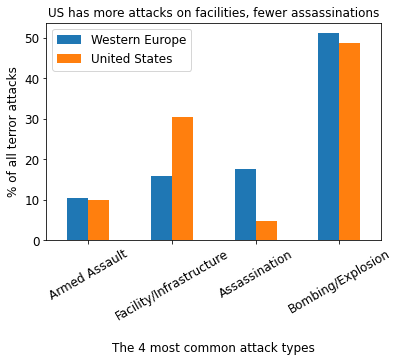

In [1474]:
attack_bar.plot(x='attacktype1_txt',
        kind='bar',
        stacked=False,
        title='US has more attacks on facilities, fewer assassinations')
plt.legend(["Western Europe","United States"])
plt.ylabel('% of all terror attacks')
plt.xticks(rotation=30)
plt.xlabel('\nThe 4 most common attack types')
plt.show()

In [1044]:
df[(df.country_txt == 'United States')& (df.attacktype1_txt == 'Facility/Infrastructure Attack')& (df.iyear > 2008)]['success'].mean()

0.9572649572649573

In [1051]:
df[(df.country_txt == 'United States')& (df.attacktype1_txt == 'Armed Assault')& (df.iyear > 2008)]['success'].mean()

0.9578947368421052

In [1052]:
df[(df.region_txt == 'Western Europe')& (df.attacktype1_txt == 'Armed Assault')& (df.iyear > 2008)]['success'].mean()

0.8327645051194539

In [1009]:
summaries_us_nat = df[(df.natlty1_txt == 'United States') & (df.country_txt == 'United States') & (df.success == 0)]
summaries_us_nat['attacktype1_txt'].value_counts()

Bombing/Explosion                      253
Facility/Infrastructure Attack          88
Assassination                           37
Unarmed Assault                         27
Armed Assault                           14
Hostage Taking (Barricade Incident)      2
Hijacking                                1
Unknown                                  1
Name: attacktype1_txt, dtype: int64

In [1057]:
df[df.country_txt == 'United States']['longitude'].max()

105.270546

In [1058]:
df[df.country_txt == 'United States']['longitude'].min()

-157.858333

In [1217]:
df[(df.country_txt == 'United States')& (df.iyear > 2005)& (df.attacktype1_txt == 'Facility/Infrastructure Attack')]['success'].mean()

0.948905109489051

In [1218]:
df[(df.country_txt == 'United States')& (df.iyear > 2005)& (df.attacktype1_txt == 'Armed Assault')]['success'].mean()

0.9591836734693877

In [1219]:
df[(df.country_txt == 'United States')& (df.iyear > 2005)& (df.attacktype1_txt == 'Bombing/Explosion')]['success'].mean()

0.5652173913043478

In [1136]:
west_coast = df[(df.country_txt == 'United States') & (df.longitude < -120)& (df.longitude > -130)& (df.iyear > 2005)]
print('Attacks on the West Coast since 2005 succeed ' + str(round(west_coast['success'].mean(),2)*100) + ' percent of the time!\n')
print(west_coast['attacktype1_txt'].value_counts())

Attacks on the West Coast since 2005 succeed 97.0 percent of the time!

Facility/Infrastructure Attack         21
Armed Assault                           8
Bombing/Explosion                       4
Hostage Taking (Barricade Incident)     1
Name: attacktype1_txt, dtype: int64


In [1493]:
east_coast = df[(df.country_txt == 'United States') & (df.longitude > -80) & (df.longitude < -60) & (df.iyear > 2005)]
print('Attacks on the East Coast since 2005 succeed ' + str(round(east_coast['success'].mean(),2)*100) + ' percent of the time.\n')
print(east_coast['attacktype1_txt'].value_counts())

Attacks on the East Coast since 2005 succeed 86.0 percent of the time.

Facility/Infrastructure Attack         29
Armed Assault                          29
Bombing/Explosion                      17
Unarmed Assault                         9
Hostage Taking (Barricade Incident)     1
Hijacking                               1
Assassination                           1
Name: attacktype1_txt, dtype: int64


In [1494]:
midwest = df[(df.country_txt == 'United States') & (df.longitude > -120) & (df.longitude < -80)& (df.iyear > 2005)]
print('Attacks in the Midwest since 2005 succeed ' + str(round(midwest['success'].mean(),2)*100) + ' percent of the time.\n')
print(midwest['attacktype1_txt'].value_counts())

Attacks in the Midwest since 2005 succeed 86.0 percent of the time.

Facility/Infrastructure Attack         87
Armed Assault                          61
Bombing/Explosion                      25
Unarmed Assault                         5
Hostage Taking (Barricade Incident)     3
Hostage Taking (Kidnapping)             2
Assassination                           2
Name: attacktype1_txt, dtype: int64


In [1497]:
df[(df.region_txt == 'Western Europe')& (df.iyear > 2005)]['success'].mean()

0.7336509311390212

In [1212]:
east_coast['nkill'].sum() / east_coast.success.sum() * 100

60.0

In [1198]:
midwest['nkill'].sum() / midwest.success.sum() * 100

148.42767295597483

In [1199]:
west_coast.nkill.sum() / west_coast.success.sum() * 100

51.515151515151516

In [1220]:
west_coast_prior.nkill.sum() / west_coast_prior.success.sum() * 100

10.933333333333334

In [1200]:
west_coast.property.sum() / west_coast.success.sum() * 100

78.78787878787878

In [1213]:
east_coast.property[east_coast.property == 1].sum() / east_coast.success.sum() * 100

70.66666666666667

In [1203]:
midwest.property.sum() / midwest.success.sum() * 100

25.157232704402517

In [1240]:
west_coast_prior = df[(df.country_txt == 'United States') & (df.longitude < -120)& (df.longitude > -130)& (df.iyear > 1979)]


In [1236]:
midwest_prior = df[(df.country_txt == 'United States') & (df.longitude > -120) & (df.longitude < -80)& (df.iyear > 1979)&(df.iyear < 2005)]
midwest_prior.property.sum() / midwest_prior.success.sum() * 100

64.37346437346437

In [1235]:
west_coast_prior.property.sum() / west_coast_prior.success.sum() * 100

84.87394957983193

In [1237]:
east_coast_prior = df[(df.country_txt == 'United States') & (df.longitude > -80) & (df.longitude < -60) & (df.iyear > 1979)& (df.iyear < 2005)]


In [1238]:
east_coast_prior.property.sum() / east_coast_prior.success.sum() * 100

84.22818791946308

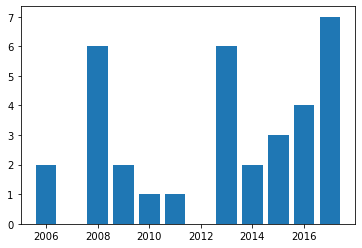

In [1223]:
west_year = west_coast.groupby('iyear')['success'].count()
plt.bar(west_year.index,west_year)
plt.show()

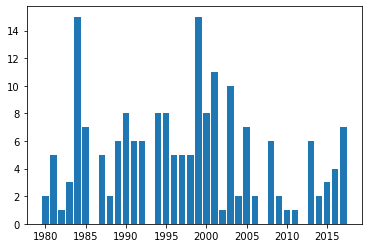

In [1241]:
west_year_prior = west_coast_prior.groupby('iyear')['success'].count()
plt.bar(west_year_prior.index,west_year_prior)
plt.show()

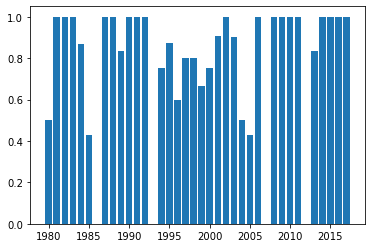

In [1244]:
west_success_rate = west_coast_prior.groupby('iyear')['success'].mean()
plt.bar(west_success_rate.index,west_success_rate)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x18d231c40>,
 'caps': [<matplotlib.lines.Line2D at 0x18d21ff10>,
 'boxes': [<matplotlib.lines.Line2D at 0x18d231970>],
 'medians': [<matplotlib.lines.Line2D at 0x18d21f5b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x18d21f430>],
 'means': []}

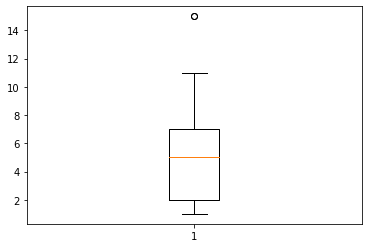

In [1255]:
box = west_coast_prior.groupby('iyear')['success'].count()
plt.boxplot(box)

In [1256]:
failed_attack = west_coast[west_coast.success == 0]
failed_attack.at[120887,'success'] = 1
failed_attack['success']

120887    1
Name: success, dtype: int64

In [1232]:
failed_attack['success']

120887    0
Name: success, dtype: int64

In [1165]:
for summary in west_coast.summary:
    print(summary)

01/17/2006: A $3 million dollar home under construction on Camano Island near Seattle, Washington, United States, was completely destroyed in an arson attack. The home belonged to Karla and Mark Verbarendse. There were no casualties and the Earth Liberation Front claimed responsibility.
7/28/2006: Naveed Afzal Haq forced his way into Jewish Federation of Greater Seattle, headquarters of the philanthropic organization, building by holding a gun to the head of a teenage girl.  He then shot 6 women working there, killing one of them and injuring the other five.  One of the victims called 911. Dispatchers calmed Haq and he exited the building with his hands on his head, where police arrested him.
2/17/2008: Unknown perpetrators ignited two fires within the Six Rivers Planned Parenthood in Eureka, California, United States.  There were no casualties and the abortion clinic only sustained $50 in damages.  Biblical scriptures were taped to the front door of the facility.
02/17/2008:  Unknown 

In [1166]:
west_coast.city.value_counts()

Seattle        4
Fairfield      3
Eureka         2
Santa Cruz     2
Vancouver      2
Tacoma         2
Portland       2
Coos Bay       2
Merced         1
Vacaville      1
Kent           1
Bellevue       1
Modesto        1
Tracy          1
Camano         1
Roseburg       1
Stockton       1
Astoria        1
Everett        1
San Mateo      1
Medford        1
Woodinville    1
San Jose       1
Name: city, dtype: int64

In [1108]:
df[(df.country_txt == 'United States') & (df.longitude < -120)& (df.iyear > 2005)]['success'].count()

34

In [1113]:
df[(df.country_txt == 'United States') & (df.longitude > -120) & (df.longitude < -80)& (df.iyear > 2005)]['success'].count()

185

In [1112]:
df[(df.country_txt == 'United States') & (df.longitude > -110) & (df.longitude < -90)& (df.iyear > 2005)]['success'].mean()

0.8311688311688312

In [1086]:
df[(df.country_txt == 'United States') & (df.longitude > -120) & (df.longitude < -80)]['success'].count()

1202

In [1142]:
df[(df.attacktype1_txt == 'Armed Assault') & (df.country_txt=='United States')]['success'].mean()

0.9401408450704225

In [1143]:
df[(df.attacktype1_txt == 'Facility/Infrastructure Attack') & (df.country_txt=='United States')]['success'].mean()

0.8958333333333334

In [1144]:
df[(df.attacktype1_txt == 'Bombing/Explosion') & (df.country_txt=='United States')]['success'].mean()

0.7823571945047

In [1149]:
df[(df.country_txt=='United States') & (df.iyear > 2005)& (df.longitude > -120)]['success'].mean()

0.8602941176470589

In [1150]:
df[(df.country_txt=='United States') & (df.iyear > 2005)]['success'].mean()

0.8725490196078431